In [1]:
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model




In [2]:
train_data = pd.read_csv("Train_dataset.csv")

In [3]:
train_data.head(5)

people_ID        Region  Gender Designation             Name Married  \
0          1  Bhubaneshwar  Female         Mrs            mansi     YES   
1          2  Bhubaneshwar  Female         Mrs        riya masi     YES   
2          3  Bhubaneshwar  Female         Mrs           sunita      NO   
3          4  Bhubaneshwar  Female         Mrs   anjali @ babli     YES   
4          5  Bhubaneshwar  Female         Mrs  champa karketta      NO   

   Children     Occupation Mode_transport  cases/1M  ...    HBB d-dimer  \
0       1.0         Farmer         Public         2  ...   93.0   233.0   
1       2.0         Farmer           Walk         2  ...   56.0   328.0   
2       1.0        Cleaner         Public         2  ...  137.0   213.0   
3       1.0         Driver            Car         2  ...  167.0   275.0   
4       2.0  Manufacturing            Car         2  ...  153.0   331.0   

   Heart rate  HDL cholesterol Charlson Index Blood Glucose  Insurance  \
0        82.0             58.0             27             7  3600000.0   
1        89.0             68.0              5             6  1600000.0   
2        77.0             43.0             40             6  3400000.0   
3        64.0             60.0             27             7   700000.0   
4        71.0             64.0             32             7  3200000.0   

    salary  FT/month  Infect_Prob  
0  1300000       2.0    49.135010  
1   400000       1.0    51.147880  
2   900000       1.0    73.224000  
3  2300000       1.0    48.779225  
4  1100000       1.0    87.868800  

[5 rows x 28 columns]

In [4]:
train_data.columns.values

array(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M',
       'Deaths/1M', 'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB',
       'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose', 'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype=object)

In [5]:
train_data["Region"].unique()

array(['Bhubaneshwar', 'Chandigarh', 'Chennai', 'Delhi', 'Bengaluru'],
      dtype=object)

In [6]:
train_data["Occupation"].unique()

array(['Farmer', 'Cleaner', 'Driver', 'Manufacturing', 'Clerk', 'Sales',
       nan, 'Business', 'Researcher', 'Legal'], dtype=object)

In [7]:
train_data = train_data.drop(["people_ID","Gender","Designation","Name","Insurance","salary"],axis =1)

In [8]:
total = train_data.isnull().sum().sort_values(ascending = False)
total

Heart rate                1114
d-dimer                   1114
Platelets                  924
Occupation                 747
FT/month                   723
Diuresis                   716
Children                   311
comorbidity                226
cardiological pressure      97
HDL cholesterol             35
HBB                         16
Mode_transport               3
Infect_Prob                  0
cases/1M                     0
Married                      0
Pulmonary score              0
Deaths/1M                    0
Age                          0
Coma score                   0
Charlson Index               0
Blood Glucose                0
Region                       0
dtype: int64

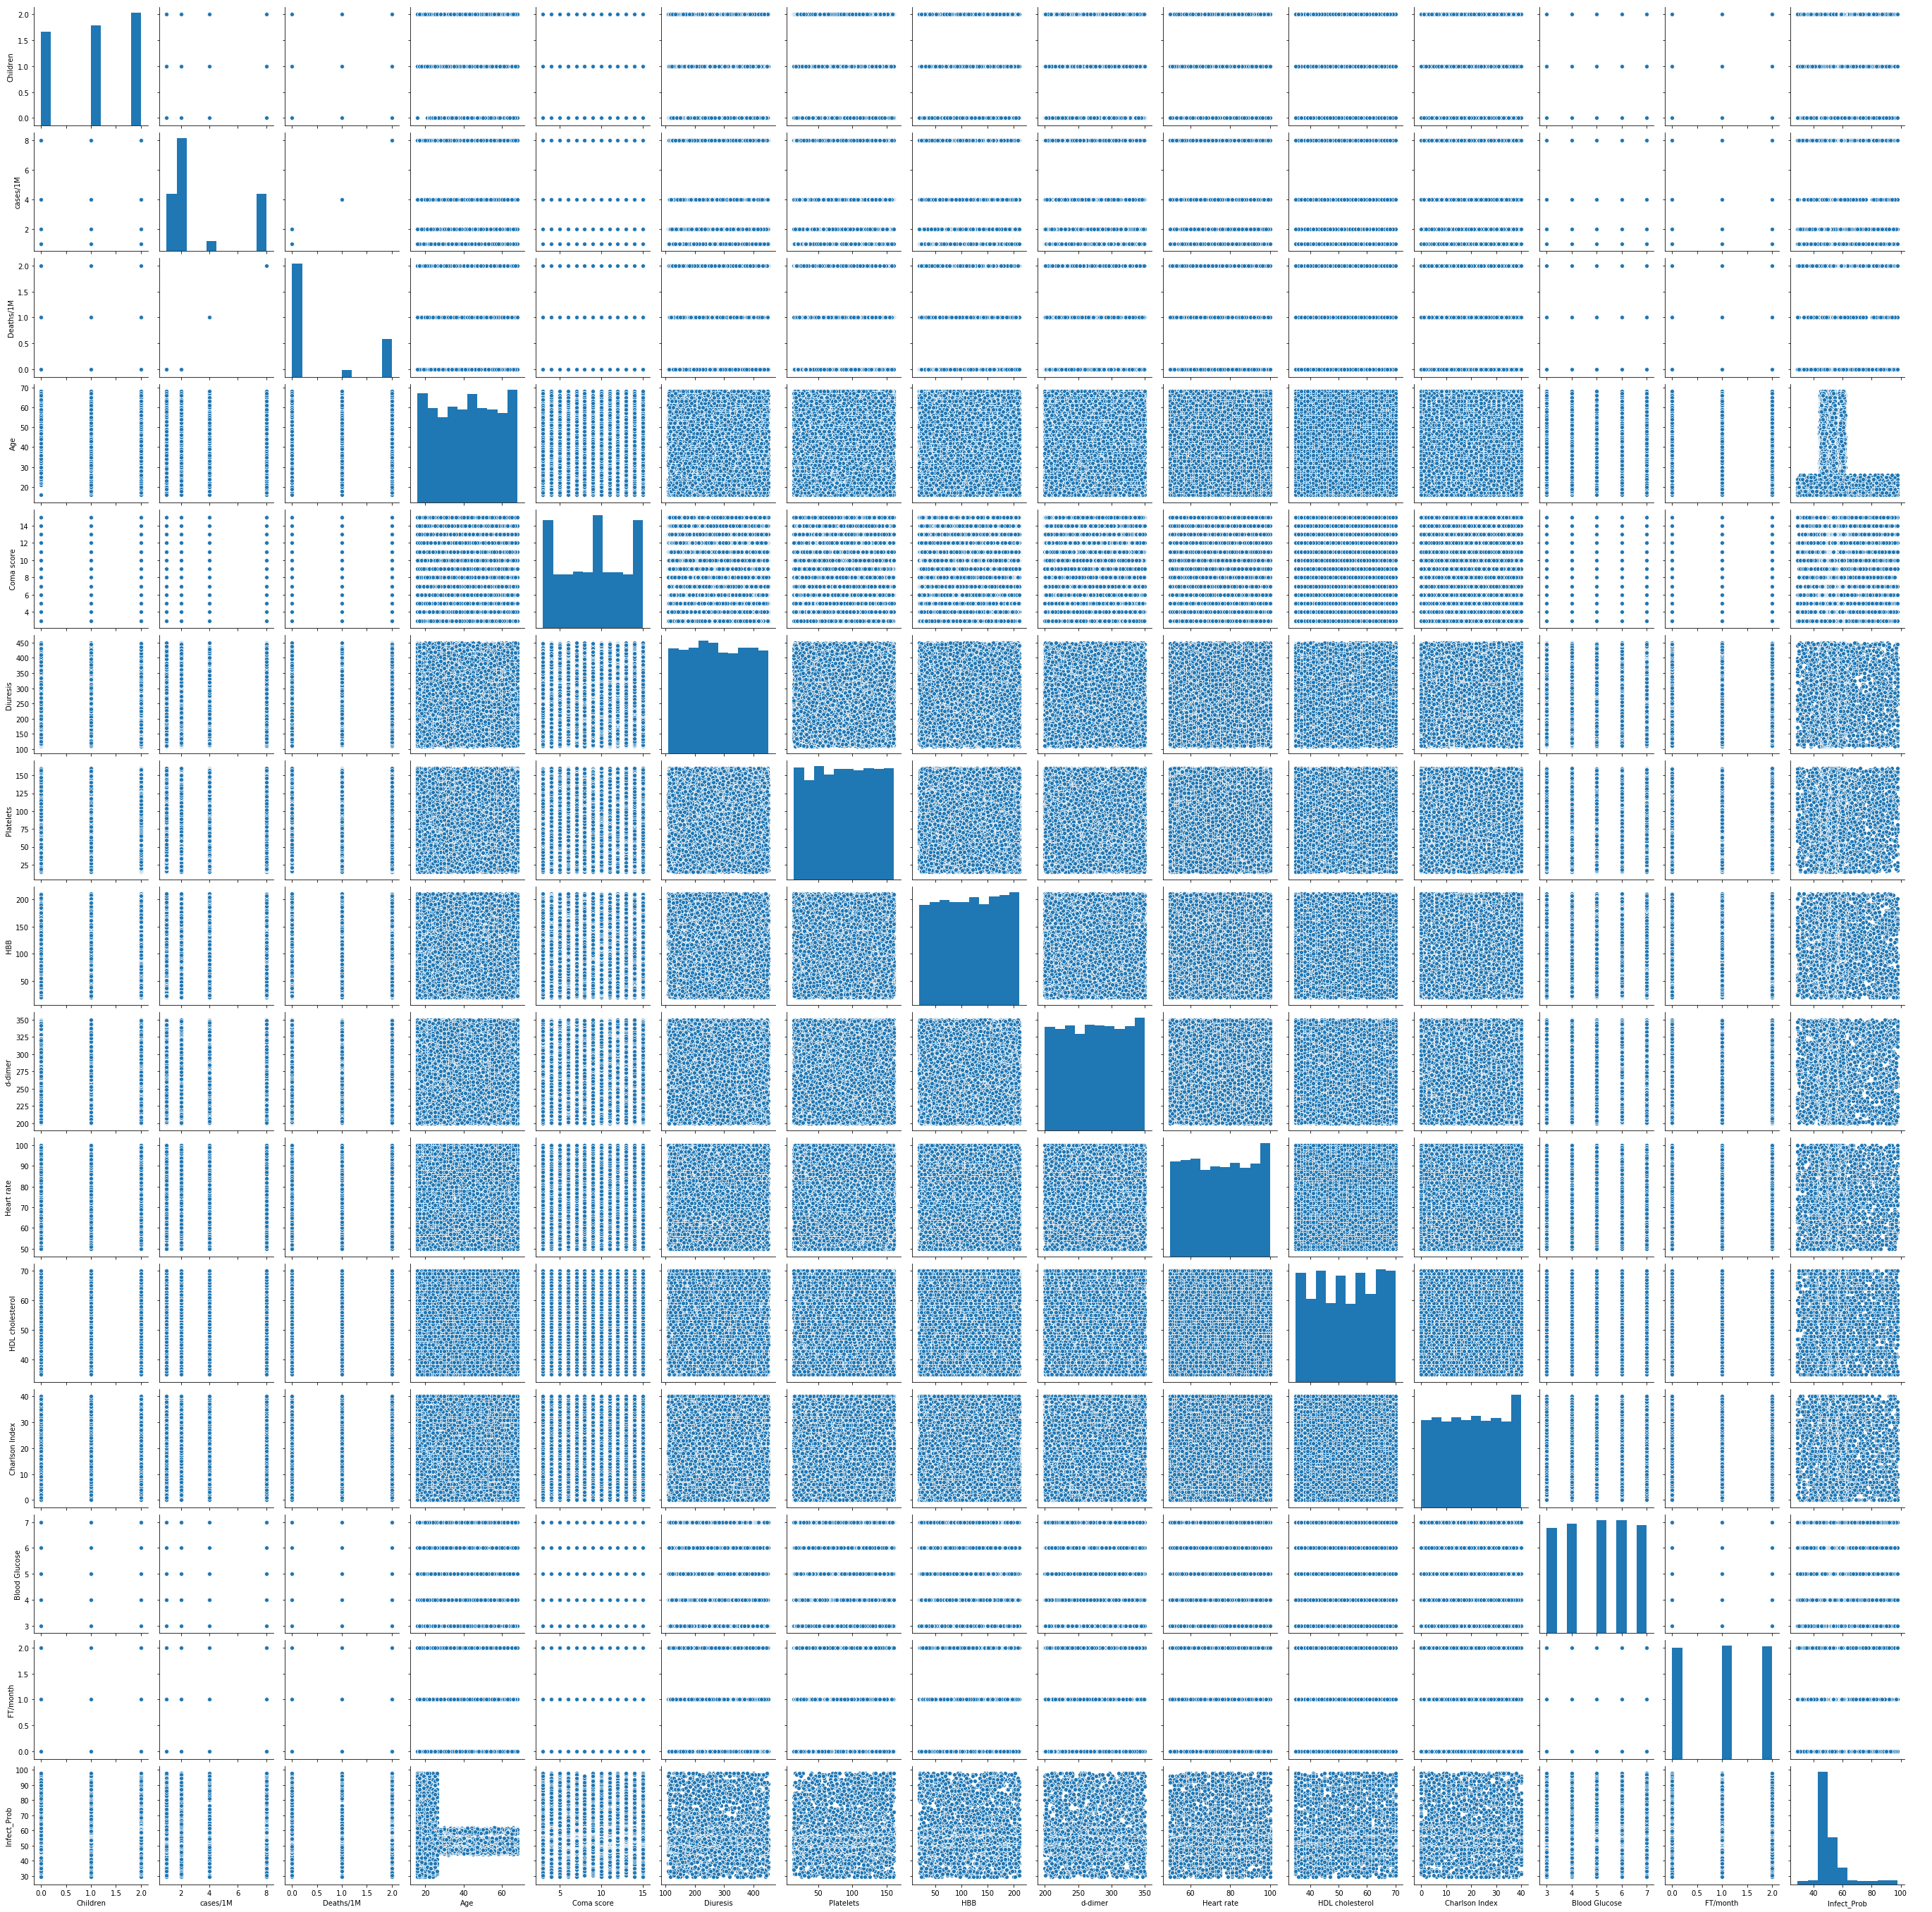

In [9]:
sns.pairplot(train_data)

In [10]:
test_data = pd.read_csv("Test_dataset.csv")

In [11]:
test_data = test_data.drop(["Gender","Designation","Name","Insurance","salary"],axis =1)

In [12]:
y_train = train_data["Infect_Prob"]
x_train = train_data.drop(["Infect_Prob"],axis = 1)

In [13]:
Id = test_data["people_ID"]
test_data = test_data.drop(["people_ID"],axis = 1)

In [14]:
train_objs_num = len(x_train)
dataset = pd.concat(objs=[x_train, test_data], axis=0)
dataset_preprocessed = pd.get_dummies(dataset)
x_train = dataset_preprocessed[:train_objs_num]
test_data = dataset_preprocessed[train_objs_num:]

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
test_data = sc.fit_transform(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
x_train.shape

(10714, 50)

In [17]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
x_train = my_imputer.fit_transform(x_train)

test_data = my_imputer.fit_transform(test_data)

In [18]:
from sklearn import linear_model
reg = linear_model.Lasso()
reg.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
pred = reg.predict(test_data)
pred

array([51.14437238, 51.14437238, 51.14437238, ..., 49.76024177,
       49.76024177, 49.76024177])

In [20]:
output = pd.DataFrame({'people_ID': Id, 'infect_prob': pred})
# you could use any filename. We choose submission here
output.to_csv('output.csv', index=False)

In [21]:
out_data = pd.read_csv("output.csv")